In [8]:
import pandas as pd
import numpy as np

file1 = pd.read_csv('data/msn_02_fuel_leak_signals_preprocessed.csv', sep=';')
file2 = pd.read_csv('data/msn_10_fuel_leak_signals_preprocessed.csv', sep=';')
file3 = pd.read_csv('data/msn_11_fuel_leak_signals_preprocessed.csv', sep=';')
file4 = pd.read_csv('data/msn_12_fuel_leak_signals_preprocessed.csv', sep=';')
file5 = pd.read_csv('data/msn_14_fuel_leak_signals_preprocessed.csv', sep=';')
file6 = pd.read_csv('data/msn_29_fuel_leak_signals_preprocessed.csv', sep=';')
file7 = pd.read_csv('data/msn_37_fuel_leak_signals_preprocessed.csv', sep=';')
file8 = pd.read_csv('data/msn_53_fuel_leak_signals_preprocessed.csv', sep=';')

# Combining Files to anayse phase 8 of all datasets

In [9]:
#combine all files into one file
combined = pd.concat([file2, file3, file4, file5, file6, file7, file8])

In [11]:
#showing the amount of unique flights we have in the dataset
print(combined['Flight'].nunique())

2229


### Creating new variables

In [3]:
#create new column called total_fuel_used which is FUEL_USED_1 + FUEL_USED_2 + FUEL_USED_3 + FUEL_USED_4
combined['total_fuel_used'] = combined['FUEL_USED_1'] + combined['FUEL_USED_2'] + combined['FUEL_USED_3'] + combined['FUEL_USED_4']

combined['Fuel_On_board_tanks'] = combined['VALUE_FUEL_QTY_CT'] + combined['VALUE_FUEL_QTY_FT1'] + combined['VALUE_FUEL_QTY_FT2'] + combined['VALUE_FUEL_QTY_FT3'] + combined['VALUE_FUEL_QTY_FT4'] + combined['VALUE_FUEL_QTY_LXT'] + combined['VALUE_FUEL_QTY_RXT']

#plot (FOB - total_fuel_used) and Fuel_On_board_tanks for each flight
combined['FOB - total_fuel_used'] = combined['VALUE_FOB'] - combined['total_fuel_used']

#calculate 2 columns called fuel_used_per_minute_FOB and fuel_used_per_minute_total_fuel_used
combined['fuel_used_per_minute_FOB_diff'] = combined['VALUE_FOB'].diff()
combined['fuel_used_per_minute_total_fuel_used_diff'] = combined['total_fuel_used'].diff()

combined['cummalitive_fuel_used'] = combined['total_fuel_used'].cumsum()

combined['initial_FOB'] = combined.groupby('Flight')['VALUE_FOB'].transform('first')

combined['initial_FOB_calculated'] = combined.groupby('Flight')['Fuel_On_board_tanks'].transform('first')

combined['fuel_used+FOB'] = combined['total_fuel_used'] + combined['VALUE_FOB']

combined['diff_initial_FOB_fuel_used+FOB'] = combined['initial_FOB'] - combined['fuel_used+FOB']

combined['predicted_FOB'] = combined['initial_FOB'] - combined['total_fuel_used']



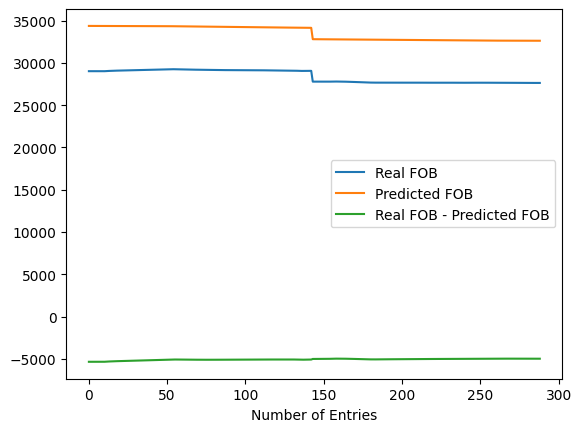

In [12]:
import matplotlib.pyplot as plt

# Filter for flight 98 and reset index
flight_98 = combined[combined['Flight'] == 44].reset_index()

plt.plot(flight_98.index, flight_98['VALUE_FOB'], label='Real FOB')
plt.plot(flight_98.index, flight_98['predicted_FOB'], label='Predicted FOB')
plt.plot(flight_98.index, flight_98['VALUE_FOB'] - flight_98['predicted_FOB'], label='Real FOB - Predicted FOB')
plt.xlabel('Number of Entries')
plt.legend()
plt.show()




In [ ]:
flight_98.plot()

In [4]:
#new column that is the difference between intial_FOB and initial_FOB_calculated
combined['diff_initial_FOB'] = combined['initial_FOB'] - combined['initial_FOB_calculated']


In [5]:
combined['alititude_diff'] = combined['FW_GEO_ALTITUDE'].diff()

In [6]:
combined['diff_FOB'] = combined['VALUE_FOB'].diff()

In [4]:
combined['Real_FOB-predicted_FOB'] = combined['VALUE_FOB'] - combined['predicted_FOB']

### Ananlysing the different flight phases

In [8]:
#calculating the average diff_initial_FOB_fuel_used+FOB for each flight phase
combined.groupby('FLIGHT_PHASE_COUNT')['diff_initial_FOB_fuel_used+FOB'].mean()

FLIGHT_PHASE_COUNT
0.0             NaN
1.0    -9291.121009
2.0    -3554.741042
3.0    -2057.494284
4.0    -5946.365684
5.0    -6670.974382
6.0    -7042.420333
7.0     -460.393888
8.0    -5378.306024
9.0      352.397597
10.0    3834.214977
11.0       2.894514
12.0   -4072.540053
Name: diff_initial_FOB_fuel_used+FOB, dtype: float64

In [9]:
combined.groupby('FLIGHT_PHASE_COUNT')['alititude_diff'].mean()

FLIGHT_PHASE_COUNT
0.0      0.600000
1.0     -6.397111
2.0     -0.013850
3.0      0.406052
4.0     -1.047671
5.0     -1.945717
6.0     31.230309
7.0     20.096136
8.0     -0.071837
9.0     -9.083145
10.0     0.840596
11.0     0.072165
12.0    -0.511470
Name: alititude_diff, dtype: float64

### Keeping only flight phase 8 now

In [4]:
#keeping only the data of FLIGHT_PHASE_COUNT = 8
combined = combined[combined['FLIGHT_PHASE_COUNT'] == 8]

In [11]:
combined.isna().sum()

UTC_TIME                                            0
FUEL_USED_2                                  17920515
FUEL_USED_3                                  17920923
FUEL_USED_4                                  17920047
FW_GEO_ALTITUDE                                     0
VALUE_FOB                                           0
VALUE_FUEL_QTY_CT                                   0
VALUE_FUEL_QTY_FT1                                  0
VALUE_FUEL_QTY_FT2                                  0
VALUE_FUEL_QTY_FT3                                  0
VALUE_FUEL_QTY_FT4                                  0
VALUE_FUEL_QTY_LXT                                  0
VALUE_FUEL_QTY_RXT                                  0
FLIGHT_PHASE_COUNT                                  0
FUEL_USED_1                                  17919763
Flight                                              0
MSN                                                 0
total_fuel_used                              17921703
Fuel_On_board_tanks         

### Dropping NA values

In [5]:
combined.dropna(inplace=True)

In [13]:
combined.isna().sum()

UTC_TIME                                     0
FUEL_USED_2                                  0
FUEL_USED_3                                  0
FUEL_USED_4                                  0
FW_GEO_ALTITUDE                              0
VALUE_FOB                                    0
VALUE_FUEL_QTY_CT                            0
VALUE_FUEL_QTY_FT1                           0
VALUE_FUEL_QTY_FT2                           0
VALUE_FUEL_QTY_FT3                           0
VALUE_FUEL_QTY_FT4                           0
VALUE_FUEL_QTY_LXT                           0
VALUE_FUEL_QTY_RXT                           0
FLIGHT_PHASE_COUNT                           0
FUEL_USED_1                                  0
Flight                                       0
MSN                                          0
total_fuel_used                              0
Fuel_On_board_tanks                          0
FOB - total_fuel_used                        0
fuel_used_per_minute_FOB_diff                0
fuel_used_per

In [14]:
combined.shape

(374827, 32)

In [15]:
combined['Flight'].nunique()

479

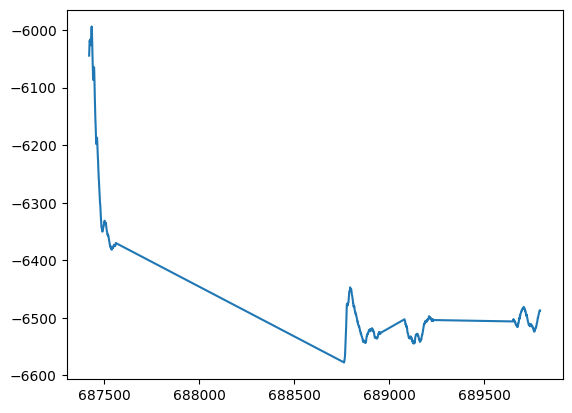

In [16]:
import matplotlib.pyplot as plt

flight107 = combined[combined['Flight'] == 98.0]
plt.plot(flight107['diff_initial_FOB_fuel_used+FOB'])

### Now analysing the different flights phase 8 values

In [17]:
#calculating the average diff_initial_FOB_fuel_used+FOB for each flight phase
combined.groupby('Flight')['diff_initial_FOB_fuel_used+FOB'].mean()

Flight
0.0       10147.962017
5.0       14840.537344
9.0        2815.034410
11.0      10167.945158
12.0     -10803.306125
              ...     
2213.0      134.716615
2214.0      151.199990
2216.0       89.552267
2221.0      432.708778
2223.0      278.200254
Name: diff_initial_FOB_fuel_used+FOB, Length: 479, dtype: float64

In [18]:
average_values = combined.groupby('Flight')['diff_initial_FOB_fuel_used+FOB'].mean()
for flight, avg in average_values.items():
    print(f"Flight: {flight}, Average: {avg}")

Flight: 0.0, Average: 10147.962017093012
Flight: 5.0, Average: 14840.537343812059
Flight: 9.0, Average: 2815.0344100344996
Flight: 11.0, Average: 10167.945157821878
Flight: 12.0, Average: -10803.306124720077
Flight: 15.0, Average: -25146.35729335161
Flight: 16.0, Average: 2966.427532567933
Flight: 17.0, Average: -9283.585294954077
Flight: 18.0, Average: 18476.367042710866
Flight: 19.0, Average: 4541.16636737645
Flight: 20.0, Average: 11128.047708136448
Flight: 21.0, Average: -4287.077530073422
Flight: 22.0, Average: -11956.374322120162
Flight: 23.0, Average: -8138.077697753403
Flight: 24.0, Average: -8089.287312481005
Flight: 26.0, Average: 2543.8176622459355
Flight: 28.0, Average: -5450.7947478851365
Flight: 29.0, Average: -373.673591382424
Flight: 35.0, Average: -9040.17722290034
Flight: 37.0, Average: -4309.154805068429
Flight: 38.0, Average: 9768.988897717789
Flight: 39.0, Average: 19742.423166009277
Flight: 40.0, Average: -9850.208952603274
Flight: 41.0, Average: -4672.78844770674

In [19]:
combined['Flight'].nunique()


479

In [20]:
combined['diff_initial_FOB_fuel_used+FOB'].mean()

-5380.402703586223

### Focusing on VALUE FOB now

### Graphing VALUE FOB

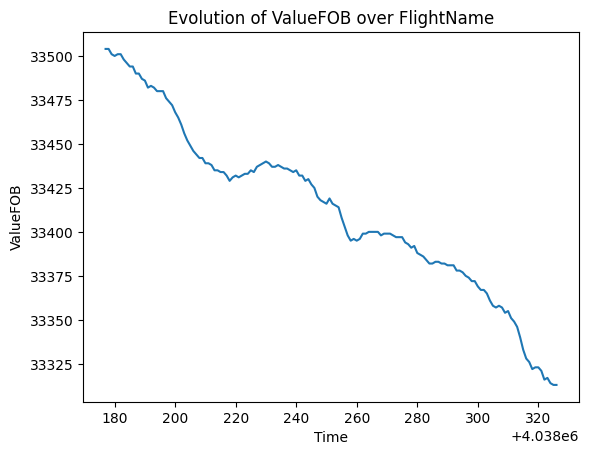

In [21]:
import matplotlib.pyplot as plt

# Replace 'FlightName' with the name of your flight
flight_data = combined[combined['Flight'] == 2216.0]

plt.plot(flight_data['VALUE_FOB'])
plt.title('Evolution of ValueFOB over FlightName')
plt.xlabel('Time')
plt.ylabel('ValueFOB')
plt.show()

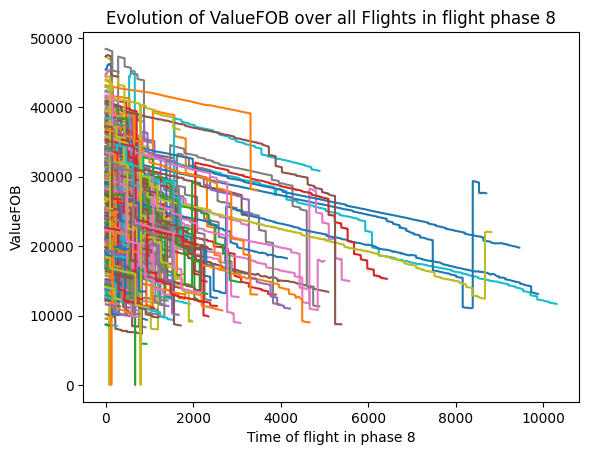

In [22]:
grouped = combined.groupby('Flight')

for name, group in grouped:
    plt.plot(group['VALUE_FOB'].values)

plt.title('Evolution of ValueFOB over all Flights in flight phase 8')
plt.xlabel('Time of flight in phase 8')
plt.ylabel('ValueFOB')
plt.show()

### Calculating graident of the curve maybe there is something with this

In [23]:
def calculate_gradient(group):
    if len(group) > 1:
        return np.gradient(group)
    else:
        return np.zeros_like(group)

combined['Gradient_VALUE_FOB'] = combined.groupby('Flight')['VALUE_FOB'].transform(calculate_gradient)

In [24]:
combined['Gradient_VALUE_FOB'].mean()

-6.8400835585483435

In [25]:
#removing the large outliers of Gradient_VALUE_FOB by clamping the values
combined['Gradient_VALUE_FOB_clamped'] = combined['Gradient_VALUE_FOB'].clip(lower=-0.1, upper=0.1)

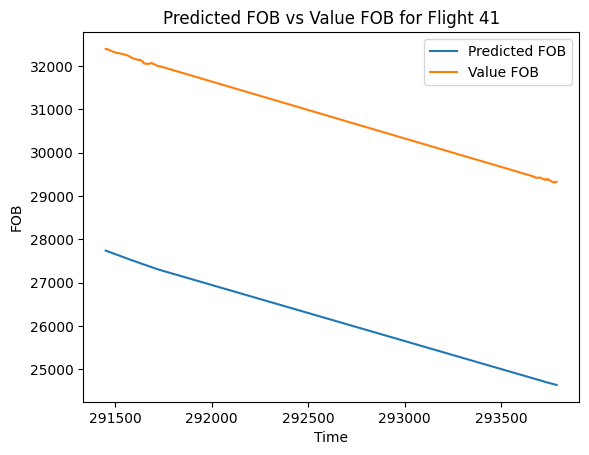

In [26]:
import matplotlib.pyplot as plt
#graphing the predicted_FOB and Value_FOB for one flight
flight = combined[combined['Flight'] == 41.0]
plt.plot(flight['predicted_FOB'])
plt.plot(flight['VALUE_FOB'])
plt.title('Predicted FOB vs Value FOB for Flight 41')
plt.xlabel('Time')
plt.ylabel('FOB')
plt.legend(['Predicted FOB', 'Value FOB'])
plt.show()

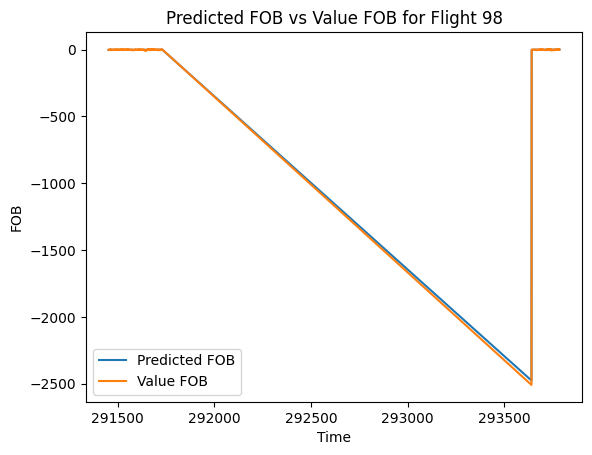

In [27]:
import matplotlib.pyplot as plt
#graphing the predicted_FOB and Value_FOB for one flight
flight = combined[combined['Flight'] == 41.0]
plt.plot(flight['predicted_FOB'].diff())
plt.plot(flight['VALUE_FOB'].diff())
plt.title('Predicted FOB vs Value FOB for Flight 98')
plt.xlabel('Time')
plt.ylabel('FOB')
plt.legend(['Predicted FOB', 'Value FOB'])
plt.show()


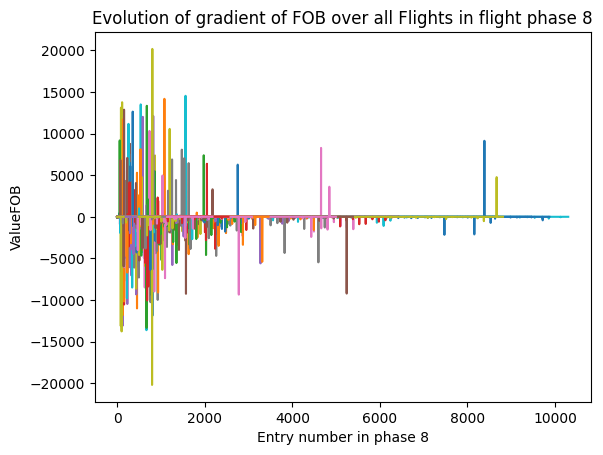

In [28]:
grouped = combined.groupby('Flight')

for name, group in grouped:
    plt.plot([i for i, _ in enumerate(group['Gradient_VALUE_FOB'])], group['Gradient_VALUE_FOB'].values)

plt.title('Evolution of gradient of FOB over all Flights in flight phase 8')
plt.xlabel('Entry number in phase 8')
plt.ylabel('ValueFOB')
plt.show()

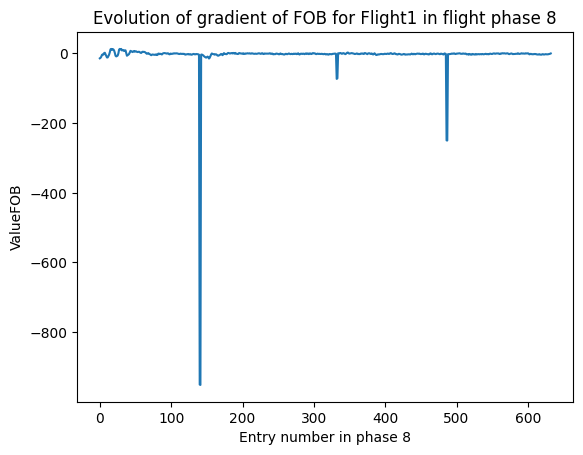

In [29]:
# Filter data for a specific flight
flight_data = combined[combined['Flight'] == 98.0]  # Replace 'Flight1' with the actual flight number

# Plot the gradient
plt.plot([i for i, _ in enumerate(flight_data['Gradient_VALUE_FOB'])], flight_data['Gradient_VALUE_FOB'].values)

plt.title('Evolution of gradient of FOB for Flight1 in flight phase 8')  # Replace 'Flight1' with the actual flight number
plt.xlabel('Entry number in phase 8')
plt.ylabel('ValueFOB')
plt.show()

In [30]:
combined.head()

,UTC_TIME,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,...,initial_FOB_calculated,fuel_used+FOB,diff_initial_FOB_fuel_used+FOB,predicted_FOB,diff_initial_FOB,alititude_diff,diff_FOB,Real_FOB-predicted_FOB,Gradient_VALUE_FOB,Gradient_VALUE_FOB_clamped
1489633,2015-07-21 03:51:31,2454.501465,2444.412842,2481.687988,336.0,30967.0,0.0,1918.0,2620.0,2604.0,...,30965.0,40793.431152,-9829.431152,21137.568848,-1.0,0.0,0.0,9829.431152,0.0,0.0
2802286,2016-10-29 08:30:12,79.764977,73.332397,71.396461,1840.0,24325.0,0.0,1819.0,2505.0,2439.0,...,24978.0,24628.052589,347.947411,24672.947411,-2.0,55.0,0.0,-347.947411,-14.0,-0.1
2802287,2016-10-29 08:30:13,79.862244,73.441658,71.505798,1890.0,24311.0,0.0,1821.0,2508.0,2436.0,...,24978.0,24614.476425,361.523575,24672.523575,-2.0,50.0,-14.0,-361.523575,-15.5,-0.1
2802288,2016-10-29 08:30:14,79.986839,73.550957,71.629326,1935.0,24294.0,0.0,1821.0,2510.0,2432.0,...,24978.0,24597.955383,378.044617,24672.044617,-2.0,45.0,-17.0,-378.044617,-18.0,-0.1
2802289,2016-10-29 08:30:15,80.097038,73.659943,71.753143,1972.0,24275.0,0.0,1820.0,2509.0,2429.0,...,24978.0,24579.420204,396.579796,24671.579796,-2.0,37.0,-19.0,-396.579796,-21.0,-0.1


In [109]:
combined.dtypes

UTC_TIME                                      object
FUEL_USED_2                                  float64
FUEL_USED_3                                  float64
FUEL_USED_4                                  float64
FW_GEO_ALTITUDE                              float64
VALUE_FOB                                    float64
VALUE_FUEL_QTY_CT                            float64
VALUE_FUEL_QTY_FT1                           float64
VALUE_FUEL_QTY_FT2                           float64
VALUE_FUEL_QTY_FT3                           float64
VALUE_FUEL_QTY_FT4                           float64
VALUE_FUEL_QTY_LXT                           float64
VALUE_FUEL_QTY_RXT                           float64
FLIGHT_PHASE_COUNT                           float64
FUEL_USED_1                                  float64
Flight                                       float64
MSN                                           object
total_fuel_used                              float64
Fuel_On_board_tanks                          f

# Z score

In [110]:
from scipy.stats import zscore

zscoredata = combined

zscoredata['z_score'] = zscore(zscoredata['VALUE_FOB'])
zscoredata['anomaly'] = zscoredata['z_score'].abs() > 3
anomalies = zscoredata[zscoredata['anomaly'] == True]

In [111]:
anomalies.groupby('Flight')['anomaly'].count()

Flight
174.0       5
419.0       6
430.0       5
492.0       6
1977.0    150
Name: anomaly, dtype: int64

# Moving Average and Exponential Smoothing

In [112]:
movingavgdata = combined
movingavgdata['moving_avg'] = movingavgdata['VALUE_FOB'].rolling(window=5).mean()
movingavgdata['moving_std'] = movingavgdata['VALUE_FOB'].rolling(window=5).std()
movingavgdata['anomaly'] = abs(movingavgdata['VALUE_FOB'] - movingavgdata['moving_avg']) > (2 * movingavgdata['moving_std'])
anomalies = movingavgdata[movingavgdata['anomaly'] == True]

In [113]:
anomalies.shape

(0, 38)

# Isolation Forest

In [114]:
columns_to_drop = ['UTC_TIME', 'MSN']  # replace with your actual column names
# Example dataset (replace with your actual dataset)
isolationforestdata = combined.drop(columns_to_drop, axis=1)

In [115]:
isolationforestdata.dropna(inplace=True)

In [116]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# Select relevant features for anomaly detection (include VALUE_FOB)
features = ['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4', 'FW_GEO_ALTITUDE', 'VALUE_FOB']

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.001)  # Adjust contamination based on expected outliers

# Fit the model and predict anomalies
isolationforestdata['anomaly'] = iso_forest.fit_predict(isolationforestdata)

# Filter anomalies
anomalies = isolationforestdata[isolationforestdata['anomaly'] == -1]

In [117]:
anomalies.shape

(374, 36)

In [118]:
pd.set_option('display.max_rows', None)  # or replace None with the number of rows you want
print(anomalies.groupby('Flight')['anomaly'].count().reset_index())


    Flight  anomaly
0     17.0        3
1     48.0        3
2     55.0        4
3     85.0        4
4     90.0        4
5    106.0        4
6    107.0      134
7    138.0        4
8    149.0       12
9    159.0        3
10   174.0        1
11   274.0        1
12   298.0       55
13   322.0        1
14   363.0        1
15   386.0        1
16   419.0        4
17   430.0        4
18   445.0        1
19   461.0       67
20   464.0       20
21   492.0        6
22   497.0        6
23   525.0        4
24  1801.0       15
25  1977.0       10
26  2142.0        2


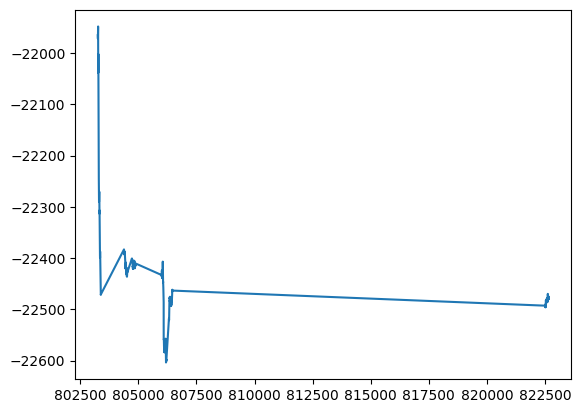

In [119]:
#graphing the VALUE_FOB of flight 107
flight107 = combined[combined['Flight'] == 107.0]
plt.plot(flight107['diff_initial_FOB_fuel_used+FOB'])

# Diff FOB

In [120]:
combined['diff_FOB'].mean()

-1.21192176657498

In [121]:
#clamp all values in the column diff_FOB that are below -5 and above 5
combined['diff_FOB_clamped'] = combined['diff_FOB'].clip(lower=-5, upper=5)

In [122]:
from sklearn.ensemble import IsolationForest
import pandas as pd

difffobdata = combined

# Select relevant features for anomaly detection (include VALUE_FOB)
features = ['VALUE_FOB', 'diff_FOB_clamped']

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.001)  # Adjust contamination based on expected outliers

# Fit the model and predict anomalies
difffobdata['anomaly'] = iso_forest.fit_predict(difffobdata[features])

# Filter anomalies
anomalies = isolationforestdata[isolationforestdata['anomaly'] == -1]

In [123]:
pd.set_option('display.max_rows', None)  # or replace None with the number of rows you want
print(anomalies.groupby('Flight')['anomaly'].count().reset_index())

    Flight  anomaly
0     17.0        3
1     48.0        3
2     55.0        4
3     85.0        4
4     90.0        4
5    106.0        4
6    107.0      134
7    138.0        4
8    149.0       12
9    159.0        3
10   174.0        1
11   274.0        1
12   298.0       55
13   322.0        1
14   363.0        1
15   386.0        1
16   419.0        4
17   430.0        4
18   445.0        1
19   461.0       67
20   464.0       20
21   492.0        6
22   497.0        6
23   525.0        4
24  1801.0       15
25  1977.0       10
26  2142.0        2


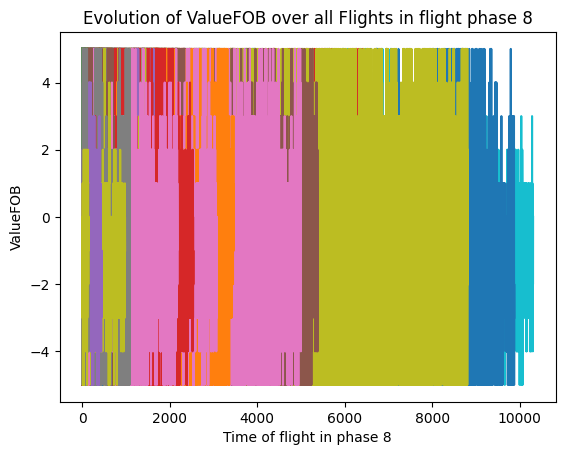

In [124]:
grouped = combined.groupby('Flight')

for name, group in grouped:
    plt.plot(group['diff_FOB_clamped'].values)

plt.title('Evolution of ValueFOB over all Flights in flight phase 8')
plt.xlabel('Time of flight in phase 8')
plt.ylabel('ValueFOB')
plt.show()

# K-Nearest Neighbors (KNN)

# Gaussian Mixture Model (GMM)

# Support Vector Machine (SVM)

# Auto-Encoder

In [125]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

columns_to_drop = ['UTC_TIME', 'MSN']  # replace with your actual column names
data = combined.drop(columns_to_drop, axis=1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define autoencoder architecture
input_dim = data_scaled.shape[1]
encoding_dim = 14  # You can adjust this

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation='linear')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train autoencoder
history = autoencoder.fit(data_scaled, data_scaled,
                          epochs=10,
                          batch_size=512,
                          shuffle=False,
                          validation_split=0.2)


Epoch 1/10


In [ ]:
# Reconstruct data
reconstructed_data = autoencoder.predict(data_scaled)
reconstruction_error = np.mean(np.abs(reconstructed_data - data_scaled), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 95)  # Adjust based on validation

# Detect anomalies
anomalies = reconstruction_error > threshold

# Add anomaly flag to the original data
data['anomaly'] = anomalies
data['reconstruction_error'] = reconstruction_error

# Check anomalies
anomalies_detected = data[data['anomaly'] == True]
print(anomalies_detected)